In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

data=pd.read_csv("dataset/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.isnull().sum()
data.drop_duplicates(inplace=True)

In [11]:
X=data[["Annual_Income_(k$)","Spending_Score"]]

In [29]:
wsse=[]
k=[]
sil_score=[]
for i in range(2,20):
    kmean=KMeans(n_clusters=i)
    k.append(i)
    kmean.fit(X)
    wsse.append(kmean.inertia_)
    score = silhouette_score(X, kmean.labels_, metric='euclidean')
    sil_score.append(score)
    

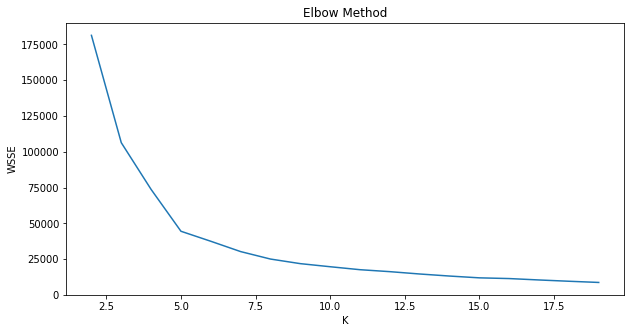

In [33]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.plot(k,wsse)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WSSE")
plt.show()

From the graph we can see a clear elbow. i.e. two sharp changes or knots in the elbow. So the optimal value of k is 5.
==
However, this may not always be the case. So, Silhouette Method can be utilized in those case
==

Let see Silhouette Score. At k=5 Silhouette score is highest
===

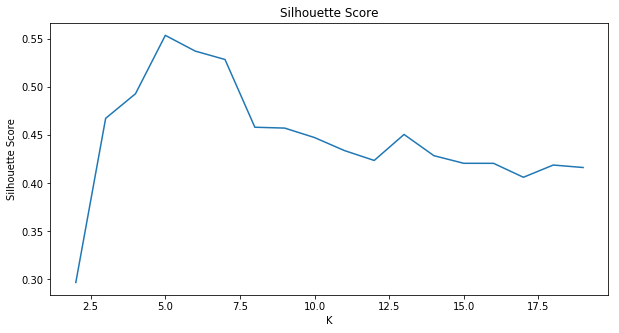

In [35]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.plot(k,sil_score)
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()